In [15]:
import numpy as np
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
import seaborn as sns

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense
from keras.layers import BatchNormalization







Using TensorFlow backend.


In [2]:
X=np.load('X.npy')
Y=np.load('Y.npy')

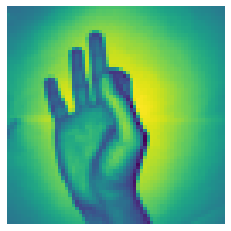

In [3]:
pl.imshow(X[0])
pl.axis('off')
pl.show()

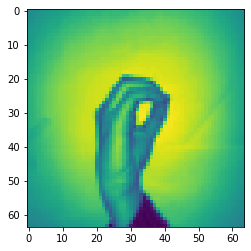

In [4]:
pl.imshow(X[300])

In [5]:
X[0]

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 , 0.5137255 ,
        0.5019608 ],
       [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 , 0.5176471 ,
        0.50980395],
       [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 , 0.5254902 ,
        0.5137255 ],
       ...,
       [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 , 0.54509807,
        0.53333336],
       [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807, 0.53333336,
        0.52156866],
       [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 , 0.52156866,
        0.50980395]], dtype=float32)

In [6]:
Y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=41)

In [8]:
X_train.shape,y_test.shape

((1649, 64, 64), (413, 10))

In [9]:
def onehot_tolabel(data):
    for i in range(len(data)):
        if data[i]==1.0:
            return i+1

In [10]:
a=onehot_tolabel([1.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
a

1

In [11]:
lst_d=[onehot_tolabel(i) for i in Y]

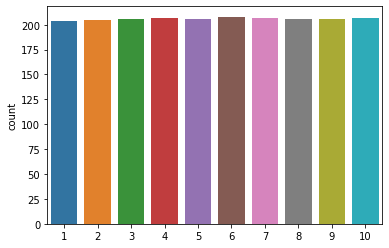

In [12]:
sns.countplot(lst_d)

In [13]:
X_train = X_train.reshape(-1,64,64,1)
X_test = X_test.reshape(-1,64,64,1)

In [14]:
X_train.shape

(1649, 64, 64, 1)

In [17]:
input_shape = X_train.shape[1:]

In [18]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Conv2D(filters = 32, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Conv2D(filters = 64, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Conv2D(filters = 128, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Conv2D(filters = 256, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)       

In [20]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [22]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Train on 1649 samples, validate on 413 samples
Epoch 1/100
1649/1649 [==============================] - 6s 4ms/step - loss: 2.2343 - accuracy: 0.3202 - val_loss: 2.7031 - val_accuracy: 0.0993
Epoch 2/100
1649/1649 [==============================] - 2s 919us/step - loss: 1.0215 - accuracy: 0.6398 - val_loss: 2.8036 - val_accuracy: 0.0993
Epoch 3/100
1649/1649 [==============================] - 1s 908us/step - loss: 0.6310 - accuracy: 0.7683 - val_loss: 2.9388 - val_accuracy: 0.0993
Epoch 4/100
1649/1649 [==============================] - 1s 897us/step - loss: 0.4409 - accuracy: 0.8460 - val_loss: 2.9700 - val_accuracy: 0.0993
Epoch 5/100
1649/1649 [==============================] - 2s 970us/step - loss: 0.3398 - accuracy: 0.8811 - val_loss: 2.4178 - val_accuracy: 0.1283
Epoch 6/100
1649/1649 [==============================] - 2s 992us/step - loss: 0.2706 - accuracy: 0.9060 - val_loss: 2.7220 - val_accuracy: 0.2228
Epoch 7/100
1649/1649 [==============================] - 2s 921us/step - 

1649/1649 [==============================] - 1s 902us/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.2035 - val_accuracy: 0.9709
Epoch 57/100
1649/1649 [==============================] - 1s 900us/step - loss: 0.0228 - accuracy: 0.9909 - val_loss: 0.1551 - val_accuracy: 0.9782
Epoch 58/100
1649/1649 [==============================] - 1s 900us/step - loss: 0.0101 - accuracy: 0.9951 - val_loss: 0.1809 - val_accuracy: 0.9685
Epoch 59/100
1649/1649 [==============================] - 1s 904us/step - loss: 0.0095 - accuracy: 0.9964 - val_loss: 0.1713 - val_accuracy: 0.9758
Epoch 60/100
1649/1649 [==============================] - 1s 903us/step - loss: 0.0299 - accuracy: 0.9927 - val_loss: 0.1624 - val_accuracy: 0.9685
Epoch 61/100
1649/1649 [==============================] - 1s 902us/step - loss: 0.0218 - accuracy: 0.9921 - val_loss: 0.1138 - val_accuracy: 0.9855
Epoch 62/100
1649/1649 [==============================] - 1s 894us/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.1305 

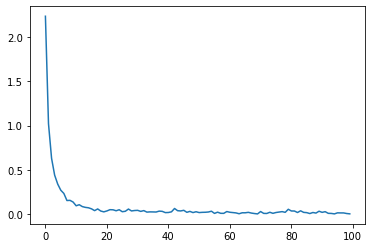

In [23]:
pl.plot(history.history['loss'])

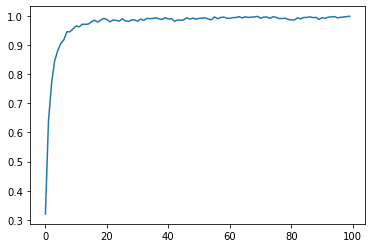

In [24]:
pl.plot(history.history['accuracy'])

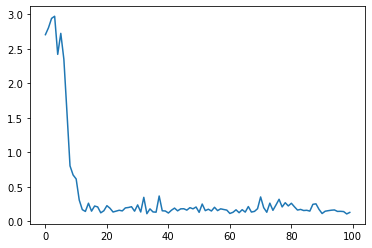

In [25]:
pl.plot(history.history['val_loss'])